# Pasos

#### Input

Esta notebook va a levantar el csv que se llame __test_results.csv__ que es la salida de la notebook __churn_model_train.ipynb__ y va a calcular algunas métricas a partir de esos resultados. 

Las columnas deben ser como las del ejemplo __'./data/example_test_results.csv'__.

Si se quiere hacer una prueba para ver cómo funciona se puede cambiar el nombre del example_test_results.csv a test_results.csv y correr la notebook

#### Output

Va a generar el csv __test_metrics.csv__.


In [1]:
import pandas as pd

In [2]:
import metrics_toolbox as mt

In [3]:
results = pd.read_csv('./data/test_results.csv', index_col = 'idclientecrm')

In [4]:
metrics = mt.create_metrics_df(results)

In [5]:
metrics.to_csv('./data/test_metrics.csv')

In [6]:
tp = mt.true_positives(results)
tn = mt.true_negatives(results)
fp = mt.false_positives(results)
fn = mt.false_negatives(results)
print(tp), print(tn), print(fp), print(fn)

705
651
159
191


(None, None, None, None)

In [7]:
#tp / (tp+fn) # (tp+fn todos los de Status Cliente = 1 - Todos los Cancelados)
mt.recall(results)

0.7868303571428571

In [8]:
#tp / (tp+fp) # (tp+fp todos los de pred = 1 - Todos los predichos como Cancelados)
mt.precision(results)

0.8159722222222222

In [9]:
metrics

,value
metric,
Total data,1706
True Positives,705
True Positives at 75%,556
True Positives at 90%,359
True Negatives,651
True Negatives at 75%,471
True Negatives at 90%,259
False Positives,159
False Positives at 75%,77


In [12]:
steps = [.05 * t for t in range(20)]

In [13]:
df = pd.DataFrame(steps)
df.columns = ['weight']

In [14]:
df['accuracy'] = df['weight'].apply(lambda x: mt.accuracy(results, filter = x))
df['recall'] = df['weight'].apply(lambda x: mt.recall(results, filter = x))
df['precision'] = df['weight'].apply(lambda x: mt.precision(results, filter = x))
df['subset relative size'] = df['weight'].apply(lambda x: mt.subset_relative_size(results, filter = x))

([<matplotlib.axis.XTick at 0x7f8106d79a20>,
 <a list of 20 Text xticklabel objects>)

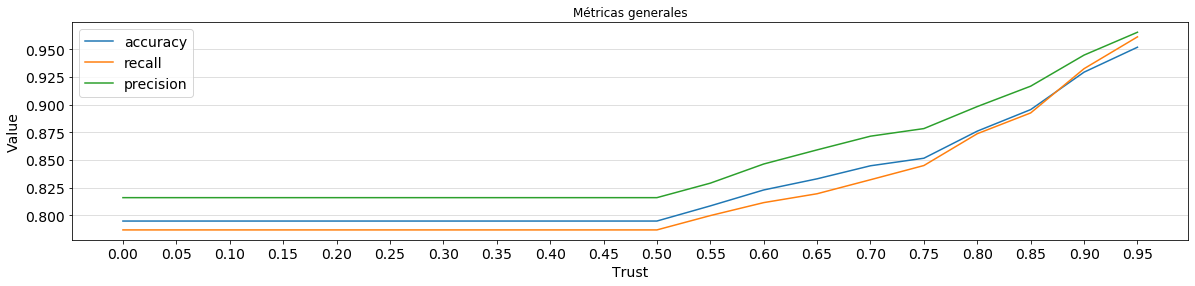

In [15]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax2 = plt.subplots()
df.filter(['weight','accuracy', 'recall', 'precision']).plot(x = 'weight', 
                                                             figsize = (20,4), 
                                                             ax = ax2,
                                                             title = 'Métricas generales',
                                                             fontsize = 14)
ax2.grid(axis = 'y', alpha = 0.5)
ax2.legend(fontsize = 14)
#ax2.xaxis(label = 'Weight')
plt.xlabel('Trust', fontsize = 14)
plt.ylabel('Value', fontsize = 14)
plt.xticks(np.arange(0, 1, .05))

In [16]:
dfBig = pd.DataFrame(steps)
dfBig.columns = ['weight']

In [17]:
features = pd.read_csv('./data/features.csv')

In [18]:
features_big = features[features['CLIENTE GRUPO_label']==0]

In [19]:
features_big

,idclientecrm,monto_total1,monto_total2,monto_total3,monto_total4,monto_total5,contratado Super Destacado1,contratado Super Destacado2,contratado Super Destacado3,contratado Super Destacado4,...,Lead Alquiler5,Lead Alquiler temporal1,Lead Alquiler temporal2,Lead Alquiler temporal3,Lead Alquiler temporal4,Lead Alquiler temporal5,CLIENTE GRUPO_label,Integrador_label,Cliente Ilimitado sin Destaque,provincia_label
3,10400010,1359.0,1359.0,1359.0,1349.0,1349.0,5.0,5.0,1.0,1.0,...,124.0,0.0,0.0,0.0,0.0,0.0,0,1,1,5
5,10400014,1499.0,1499.0,1499.0,1499.0,1499.0,1.0,1.0,1.0,1.0,...,654.0,0.0,0.0,0.0,0.0,0.0,0,1,1,5
6,10400015,3958.0,3958.0,1359.0,1359.0,1359.0,55.0,5.0,5.0,5.0,...,136.0,0.0,0.0,0.0,0.0,0.0,0,1,1,5
8,10400024,5149.0,5149.0,2899.0,2899.0,2899.0,25.0,25.0,25.0,25.0,...,840.0,0.0,0.0,0.0,0.0,0.0,0,1,1,5
10,10400028,1190.0,1190.0,1190.0,1190.0,1190.0,12.0,12.0,12.0,12.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11112,47285461,1000.0,-3000.0,1000.0,5000.0,5000.0,40.0,40.0,280.0,380.0,...,810.0,298.0,286.0,179.0,185.0,399.0,0,1,0,0
11153,47286611,599.0,1198.0,1797.0,1198.0,1198.0,203.0,203.0,153.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,25
11166,47287213,849.0,849.0,849.0,1448.0,1448.0,20.0,20.0,20.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,13
11221,47288738,799.0,2096.0,1097.0,1097.0,598.0,329.0,129.0,129.0,29.0,...,58.0,0.0,0.0,0.0,0.0,0.0,0,1,0,25


In [20]:
results_big = results[results.index.isin(features_big.idclientecrm)]

In [21]:
len(results_big[results_big['correct']==True]) / len(results_big)

0.8333333333333334

In [22]:
dfBig = pd.DataFrame(steps)
dfBig.columns = ['weight']

In [23]:
dfBig['accuracy'] = dfBig['weight'].apply(lambda x: mt.accuracy(results_big, filter = x))
dfBig['recall'] = dfBig['weight'].apply(lambda x: mt.recall(results_big, filter = x))
dfBig['precision'] = dfBig['weight'].apply(lambda x: mt.precision(results_big, filter = x))
dfBig['subset relative size'] = dfBig['weight'].apply(lambda x: mt.subset_relative_size(results_big, filter = x))

([<matplotlib.axis.XTick at 0x7f8104a57f98>,
 <a list of 20 Text xticklabel objects>)

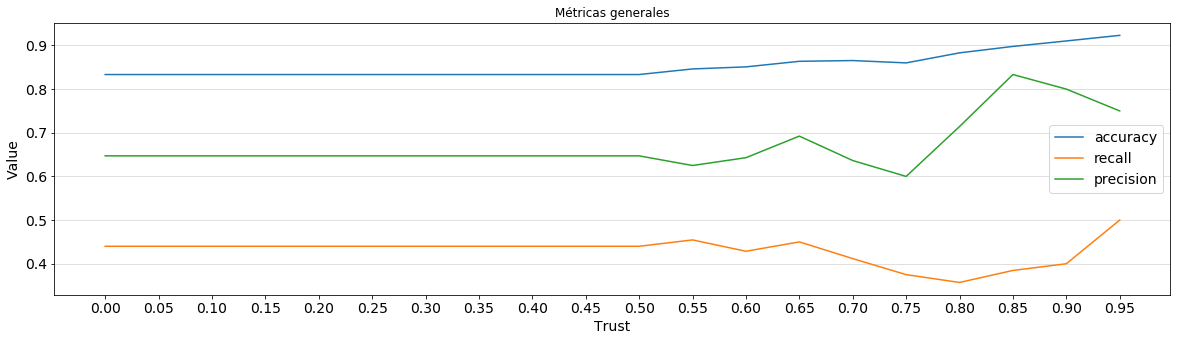

In [24]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax2 = plt.subplots()
dfBig.filter(['weight','accuracy', 'recall', 'precision']).plot(x = 'weight', 
                                                             figsize = (20,5), 
                                                             ax = ax2,
                                                             title = 'Métricas generales',
                                                             fontsize = 14)
ax2.grid(axis = 'y', alpha = 0.5)
ax2.legend(fontsize = 14)
#ax2.xaxis(label = 'Weight')
plt.xlabel('Trust', fontsize = 14)
plt.ylabel('Value', fontsize = 14)
plt.xticks(np.arange(0, 1, .05))

In [25]:
len(results)

1706

In [26]:
df['subset size'] = len(results)*df['subset relative size']

([<matplotlib.axis.XTick at 0x7f8104abc198>,
 <a list of 20 Text xticklabel objects>)

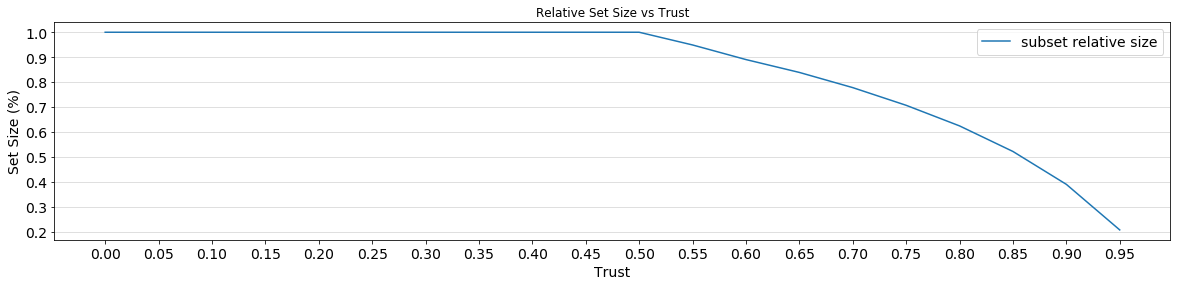

In [27]:
fig, ax2 = plt.subplots()
df.filter(['weight', 'subset relative size']).plot(x = 'weight', 
                                                             figsize = (20,4), 
                                                             ax = ax2,
                                                             title = 'Relative Set Size vs Trust',
                                                             fontsize = 14)
ax2.grid(axis = 'y', alpha = 0.5)
ax2.legend(fontsize = 14)
#ax2.xaxis(label = 'Weight')
plt.xlabel('Trust', fontsize = 14)
plt.ylabel('Set Size (%)', fontsize = 14)
plt.xticks(np.arange(0, 1, .05))

In [28]:
dfBig

,weight,accuracy,recall,precision,subset relative size
0,0.00,0.833333,0.440000,0.647059,1.000000
1,0.05,0.833333,0.440000,0.647059,1.000000
2,0.10,0.833333,0.440000,0.647059,1.000000
3,0.15,0.833333,0.440000,0.647059,1.000000
4,0.20,0.833333,0.440000,0.647059,1.000000
5,0.25,0.833333,0.440000,0.647059,1.000000
6,0.30,0.833333,0.440000,0.647059,1.000000
7,0.35,0.833333,0.440000,0.647059,1.000000
8,0.40,0.833333,0.440000,0.647059,1.000000
9,0.45,0.833333,0.440000,0.647059,1.000000


In [29]:
# Recall
# (tp/(tp+fn))
mt.recall(results_big)
#mt.recall(results_big)

0.44

In [30]:
print('Total: {}'.format(len(results_big)))
print('Cancelados: {}'.format(len(results_big[results_big['Status Cliente']==1])))
print('Cancelados no predichos (fn): {}'.format(mt.false_negatives(results_big)))
print('Cancelados predichos (tp): {}'.format(mt.true_positives(results_big)))

print('Recall: {}'.format(mt.recall(results_big)))
print('Precision: {}'.format(mt.precision(results_big)))

Total: 120
Cancelados: 25
Cancelados no predichos (fn): 14
Cancelados predichos (tp): 11
Recall: 0.44
Precision: 0.6470588235294118


In [96]:
df = results[results['weight']>.9]

In [97]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_pred = df['pred'], y_true = df['Status Cliente'])

In [98]:
import seaborn as sns
def plot_confussion_matrix(confusion, strategy = 'Random Forest Classifier'):
    plt.figure(figsize = (4,3))
    classes = ['Vigente', 'Cancelado']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    ax = sns.heatmap(confusion, annot=True, annot_kws={"size": 15},fmt="d")
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
    ax.set_yticklabels(classes, rotation=0)
    ax.set_xticklabels(classes, rotation=0)
    plt.title('Confusion Matrix for '+strategy, fontweight="bold")

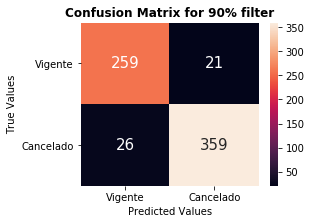

In [99]:
plot_confussion_matrix(confusion, strategy = "90% filter")

In [52]:
mt.false_positives(results)

159